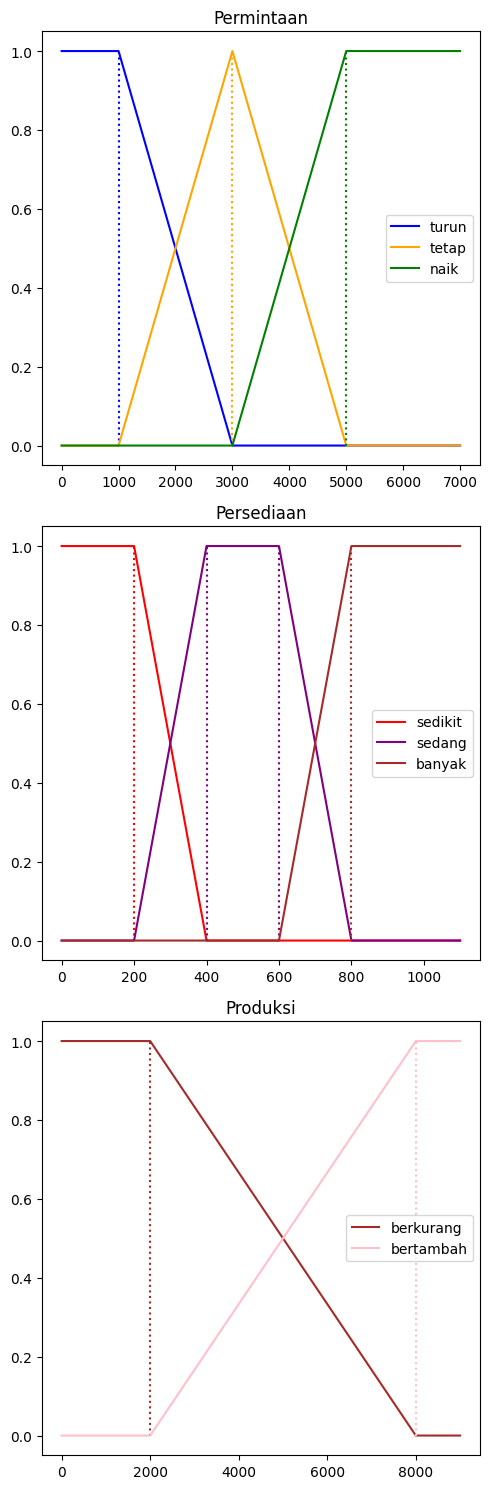

In [1]:
import matplotlib.pyplot as plt

# Range grafik
x_permintaan = range(0, 7001, 100)
x_persediaan = range(0, 1101, 50)
x_produksi = range(0, 9001, 500)

# Fungsi Permintaan
def permintaan_turun(x):
    if x <= 1000:
        return 1
    elif 1000 < x <= 3000:
        return (3000 - x) / 2000
    else:
        return 0

def permintaan_tetap(x):
    if 1000 < x <= 3000:
        return (x - 1000) / 2000
    elif 3000 < x <= 5000:
        return (5000 - x) / 2000
    else:
        return 0

def permintaan_naik(x):
    if x <= 3000:
        return 0
    elif 3000 < x <= 5000:
        return (x - 3000) / 2000
    else:
        return 1

# Fungsi keanggotaan untuk Persediaan
def persediaan_sedikit(x):
    if x <= 200:
        return 1
    elif 200 < x <= 400:
        return (400 - x) / 200
    else:
        return 0

def persediaan_sedang(x):
    if 200 < x <= 400:
        return (x - 200) / 200
    elif 400 < x <= 600:
        return 1
    elif 600 < x <= 800:
        return (800 - x) / 200
    else:
        return 0

def persediaan_banyak(x):
    if x <= 600:
        return 0
    elif 600 < x <= 800:
        return (x - 600) / 200
    else:
        return 1

# Fungsi Produksi
def produksi_berkurang(x):
    if x <= 2000:
        return 1
    elif 2000 < x <= 8000:
        return (8000 - x) / 6000
    else:
        return 0

def produksi_bertambah(x):
    if x <= 2000:
        return 0
    elif 2000 < x <= 8000:
        return (x - 2000) / 6000
    else:
        return 1

# Menghitung nilai keanggotaan untuk masing-masing grafik
y_permintaan_turun = [permintaan_turun(i) for i in x_permintaan]
y_permintaan_tetap = [permintaan_tetap(i) for i in x_permintaan]
y_permintaan_naik = [permintaan_naik(i) for i in x_permintaan]

y_persediaan_sedikit = [persediaan_sedikit(i) for i in x_persediaan]
y_persediaan_sedang = [persediaan_sedang(i) for i in x_persediaan]
y_persediaan_banyak = [persediaan_banyak(i) for i in x_persediaan]

y_produksi_berkurang = [produksi_berkurang(i) for i in x_produksi]
y_produksi_bertambah = [produksi_bertambah(i) for i in x_produksi]

# subplots
fig, axes = plt.subplots(3, 1, figsize=(5, 15))

# Grafik Permintaan
axes[0].plot(x_permintaan, y_permintaan_turun, label='turun', color='blue', linestyle='solid')
axes[0].vlines(1000, 0, 1, colors='blue', linestyles='dotted')
axes[0].plot(x_permintaan, y_permintaan_tetap, label='tetap', color='orange', linestyle='solid')
axes[0].vlines(3000, 0, 1, colors='orange', linestyles='dotted')
axes[0].plot(x_permintaan, y_permintaan_naik, label='naik', color='green', linestyle='solid')
axes[0].vlines(5000, 0, 1, colors='green', linestyles='dotted')
axes[0].set_title('Permintaan')
axes[0].legend()

# Grafik Persediaan
axes[1].plot(x_persediaan, y_persediaan_sedikit, label='sedikit', color='red', linestyle='solid')
axes[1].vlines(200, 0, 1, colors='red', linestyles='dotted')
axes[1].plot(x_persediaan, y_persediaan_sedang, label='sedang', color='purple', linestyle='solid')
axes[1].vlines(400, 0, 1, colors='purple', linestyles='dotted')
axes[1].vlines(600, 0, 1, colors='purple', linestyles='dotted')
axes[1].plot(x_persediaan, y_persediaan_banyak, label='banyak', color='brown', linestyle='solid')
axes[1].vlines(800, 0, 1, colors='brown', linestyles='dotted')
axes[1].set_title('Persediaan')
axes[1].legend()

# Grafik Produksi
axes[2].plot(x_produksi, y_produksi_berkurang, label='berkurang', color='brown', linestyle='solid')
axes[2].vlines(2000, 0, 1, colors='brown', linestyles='dotted')
axes[2].plot(x_produksi, y_produksi_bertambah, label='bertambah', color='pink', linestyle='solid')
axes[2].vlines(8000, 0, 1, colors='pink', linestyles='dotted')
axes[2].set_title('Produksi')
axes[2].legend()

# Menyembunyikan grid
for ax in axes:
    ax.grid(False)

# Menampilkan grafik
plt.tight_layout()
plt.show()

In [8]:
# Input manual nilai permintaan dan persediaan
input_permintaan = 3500  # Nilai input permintaan
input_persediaan = 300   # Nilai input persediaan

# Fuzzifikasi
mu_permintaan_turun = permintaan_turun(input_permintaan)
mu_permintaan_tetap = permintaan_tetap(input_permintaan)
mu_permintaan_naik = permintaan_naik(input_permintaan)

mu_persediaan_sedikit = persediaan_sedikit(input_persediaan)
mu_persediaan_sedang = persediaan_sedang(input_persediaan)
mu_persediaan_banyak = persediaan_banyak(input_persediaan)

# Menampilkan hasil fuzzifikasi
print("Fuzzifikasi:")
print(f"Permintaan - Turun: {mu_permintaan_turun}, Tetap: {mu_permintaan_tetap}, Naik: {mu_permintaan_naik}")
print(f"Persediaan - Sedikit: {mu_persediaan_sedikit}, Sedang: {mu_persediaan_sedang}, Banyak: {mu_persediaan_banyak}")

# Inferensi (Aturan Fuzzy)
# Aturan:
# 1. Jika Permintaan Naik dan Persediaan Sedikit, maka Produksi Bertambah
# 2. Jika Permintaan Tetap dan Persediaan Sedang, maka Produksi Tetap
# 3. Jika Permintaan Turun dan Persediaan Banyak, maka Produksi Berkurang

# Aturan inferensi
inferensi_1 = min(mu_permintaan_naik, mu_persediaan_sedikit)  # Produksi Bertambah
inferensi_2 = min(mu_permintaan_tetap, mu_persediaan_sedang)  # Produksi Tetap
inferensi_3 = min(mu_permintaan_turun, mu_persediaan_banyak)  # Produksi Berkurang

# Menampilkan hasil inferensi
print("\nInferensi:")
print(f"Produksi Bertambah: {inferensi_1}")
print(f"Produksi Tetap: {inferensi_2}")
print(f"Produksi Berkurang: {inferensi_3}")

# Defuzzifikasi (Metode Centroid)
# Nilai keluaran fuzzy
output_produksi = {
    "berkurang": inferensi_3,
    "bertambah": inferensi_1,
}

# Perhitungan nilai centroid
# Misalkan domain produksi adalah [0, 9000]
produksi_range = range(0, 9001, 500)

# Fungsi keanggotaan gabungan untuk defuzzifikasi
def fungsi_keanggotaan_produksi(x):
    berkurang = produksi_berkurang(x) * inferensi_3
    bertambah = produksi_bertambah(x) * inferensi_1
    return max(berkurang, bertambah)

# Numerator dan denominator untuk centroid
numerator = sum(x * fungsi_keanggotaan_produksi(x) for x in produksi_range)
denominator = sum(fungsi_keanggotaan_produksi(x) for x in produksi_range)

# Hasil defuzzifikasi
crisp_output = numerator / denominator if denominator != 0 else 0

# Menampilkan hasil defuzzifikasi
print("\nDefuzzifikasi:")
print(f"Nilai Produksi: {crisp_output:.2f}")

# Menampilkan grafik seperti sebelumnya (opsional)
# Grafik sudah diimplementasi di kode sebelumnya


Fuzzifikasi:
Permintaan - Turun: 0, Tetap: 0.75, Naik: 0.25
Persediaan - Sedikit: 0.5, Sedang: 0.5, Banyak: 0

Inferensi:
Produksi Bertambah: 0.25
Produksi Tetap: 0.5
Produksi Berkurang: 0

Defuzzifikasi:
Nilai Produksi: 6774.51
